# Systematic Literature Review: Extraction of Design models from Software Requeriments Specification

## Importing the libraries

In [618]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from matplotlib import style 
#plt.style.use('ggplot') 
plt.style.use('seaborn-v0_8') 




## Main constants

In [619]:
PUBLICATION_YEAR = 'Publication Year'
SYNONYMUS = 'Synonymus / Alike Terms'
TERM = 'Term'
PICOC = 'PICOC'
TITLE = 'Title'
CITED = 'cited'
ITEM_TYPE = 'Item Type'

## Join synonymus

In [620]:
def join_synonymus(string):
    list_string = string.split(',')
    
    for idx, x in enumerate(list_string):
        list_string[idx] = '"'+x.upper().strip()+'"'
    return ' OR '.join(list_string)

## Importing the dataset

In [621]:
dataset = pd.read_csv('data/Systematic Literature Review (SLR) - PICOC Criteria.csv')

## Create Query by PICOC Terms

In [622]:
picoc_terms = {}

for index, row in dataset.iterrows():
    if row[TERM] in picoc_terms:
        picoc_terms[row[TERM]] = picoc_terms[row[TERM]] + ' OR "'+row[PICOC].upper().strip()+'"' + ' OR ' + join_synonymus(row[SYNONYMUS])
    else:
       picoc_terms[row[TERM]] = '"'+row[PICOC].upper().strip()+'"' + ' OR ' + join_synonymus(row[SYNONYMUS])
print(picoc_terms)

{'Population': '"SOFTWARE DEVELOPMENT INDUSTRY" OR "SOFTWARE INDUSTRY" OR "IT PROJECT" OR "SOFTWARE PRACTITIONER" OR "TEAM MEMBERS" OR "PROGRAMMER" OR "SOFTWARE ARCHITECT" OR "SOFTWARE ANALYST" OR "TESTER" OR "SOFTWARE DEVELOPMENT LIFECYCLE" OR "SOFTWARE DEVELOPMENT PROCESS" OR "SOFTWARE PROCESS" OR "SOFTWARE LIFECYCLE" OR "AGILE METHOLODOGIES"', 'Intervention': '"SOFTWARE REQUIREMENTS SPECIFICATION" OR "SRS" OR "USER HISTORIES" OR "USE CASE" OR "EPIC" OR "FUNCTIONAL REQUIREMENTS" OR "NOT FUNCTIONAL REQUIREMENTS" OR "SYSTEM REQUIREMENTS" OR "SOFTWARE DESIGN" OR "SOFTWARE ARCHITECTURE" OR "SYSTEM ARCHITECTURE" OR "UML" OR "DESIGN PATTERNS" OR "UNIFIED MODELING LANGUAGE" OR "UML"', 'Comparison': '"CODE INTELLIGENCE" OR "LOWCODE" OR "LOW-CODE" OR "ARTIFICIAL INTELLIGENCE" OR "AI" OR "NATURAL LANGUAJE PROCESSING TECHNIQUES" OR "NATURAL LANGUAJE PROCESSING" OR "NLP" OR "GENERATIVE AI" OR "GENAI" OR "MACHINE LEARNING" OR "ML" OR "DEEP LEARNING" OR "DL" OR "LARGE LANGUAGE MODELS" OR "LLM" OR 

## Create Base Query

In [623]:
base_query_array = []
for key in picoc_terms:
    base_query_array.append('('+picoc_terms[key]+')')
 
base_query = ' AND '.join(base_query_array);   
print(base_query)

("SOFTWARE DEVELOPMENT INDUSTRY" OR "SOFTWARE INDUSTRY" OR "IT PROJECT" OR "SOFTWARE PRACTITIONER" OR "TEAM MEMBERS" OR "PROGRAMMER" OR "SOFTWARE ARCHITECT" OR "SOFTWARE ANALYST" OR "TESTER" OR "SOFTWARE DEVELOPMENT LIFECYCLE" OR "SOFTWARE DEVELOPMENT PROCESS" OR "SOFTWARE PROCESS" OR "SOFTWARE LIFECYCLE" OR "AGILE METHOLODOGIES") AND ("SOFTWARE REQUIREMENTS SPECIFICATION" OR "SRS" OR "USER HISTORIES" OR "USE CASE" OR "EPIC" OR "FUNCTIONAL REQUIREMENTS" OR "NOT FUNCTIONAL REQUIREMENTS" OR "SYSTEM REQUIREMENTS" OR "SOFTWARE DESIGN" OR "SOFTWARE ARCHITECTURE" OR "SYSTEM ARCHITECTURE" OR "UML" OR "DESIGN PATTERNS" OR "UNIFIED MODELING LANGUAGE" OR "UML") AND ("CODE INTELLIGENCE" OR "LOWCODE" OR "LOW-CODE" OR "ARTIFICIAL INTELLIGENCE" OR "AI" OR "NATURAL LANGUAJE PROCESSING TECHNIQUES" OR "NATURAL LANGUAJE PROCESSING" OR "NLP" OR "GENERATIVE AI" OR "GENAI" OR "MACHINE LEARNING" OR "ML" OR "DEEP LEARNING" OR "DL" OR "LARGE LANGUAGE MODELS" OR "LLM" OR "GPT" OR "PALM" OR "BERT" OR "CLAUDE" O

## Save Base query to file

In [624]:
with open("queries/base_query.sql", "w") as text_file:
    print("{}".format(base_query), file=text_file)

## Save Scopus query

In [625]:
with open("queries/scopus_query.sql", "w") as text_file:
    print("TITLE-ABS-KEY({}) AND (LIMIT-TO(PUBYEAR,2016) OR LIMIT-TO(PUBYEAR,2017) OR LIMIT-TO(PUBYEAR,2018) OR LIMIT-TO(PUBYEAR,2019) OR LIMIT-TO(PUBYEAR,2020))".format(base_query), file=text_file)

## Articles analysis

,Publication Year,Title,Item Type,cited
25,2021,CodeXGLUE: A Machine Learning Benchmark Datase...,preprint,769
24,2015,UML @ Classroom: An Introduction to Object-Ori...,book,226
1,2017,PURE: A Dataset of Public Requirements Documents,conferencePaper,181
21,2011,Semi-automatic generation of UML models from n...,conferencePaper,154
5,2009,An Automated Tool for Generating UML Models fr...,conferencePaper,152
19,2018,Automatic Transformation of User Stories into ...,journalArticle,138
17,1996,Processing natural language software requireme...,conferencePaper,118
20,2009,Object Oriented Software Modeling Using NLP Ba...,journalArticle,85
28,2017,Natural Language Requirements Processing: A 4D...,journalArticle,75
6,2018,Artificial Intelligence Techniques in Software...,conferencePaper,41


<Axes: ylabel='Title'>

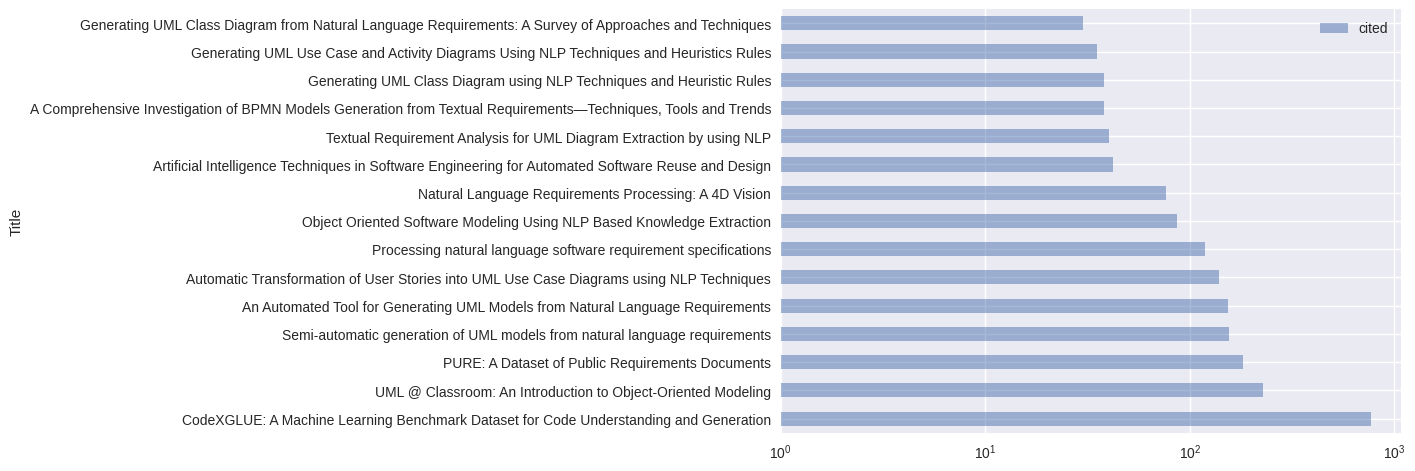

In [626]:
articles = pd.read_csv('data/articles.csv')
cites = pd.read_csv('data/cites.csv')
articles = pd.merge(articles, cites, on='Title', how='left', validate="many_to_many")
#articles.plot.bar(x="Title", y="cited", alpha=0.5,log=True)
articles_top = articles.sort_values(CITED, ascending=False).head(15)[[PUBLICATION_YEAR,TITLE,ITEM_TYPE,CITED]]
display(articles_top)
articles_top.plot.barh(x="Title", y="cited", alpha=0.5,log=True)



## Articles by Publication Year

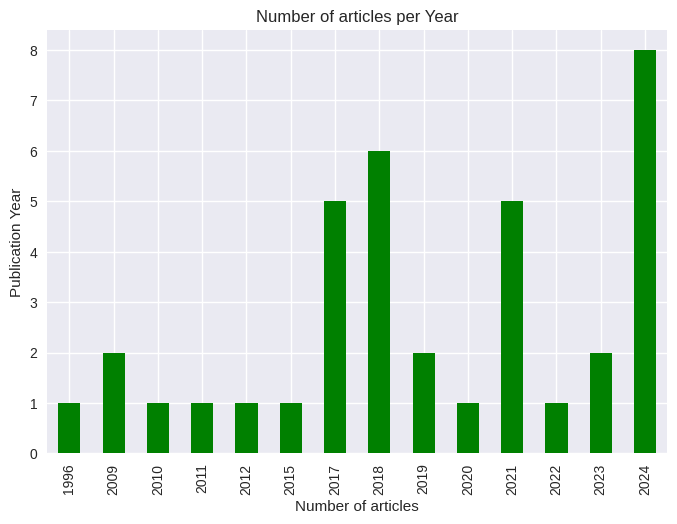

In [627]:
publication_year = articles[PUBLICATION_YEAR].value_counts().sort_index().plot.bar(color='green')
plt.xlabel('Number of articles')
plt.ylabel('Publication Year')
plt.title('Number of articles per Year')
plt.show()

## Articles by Item Type

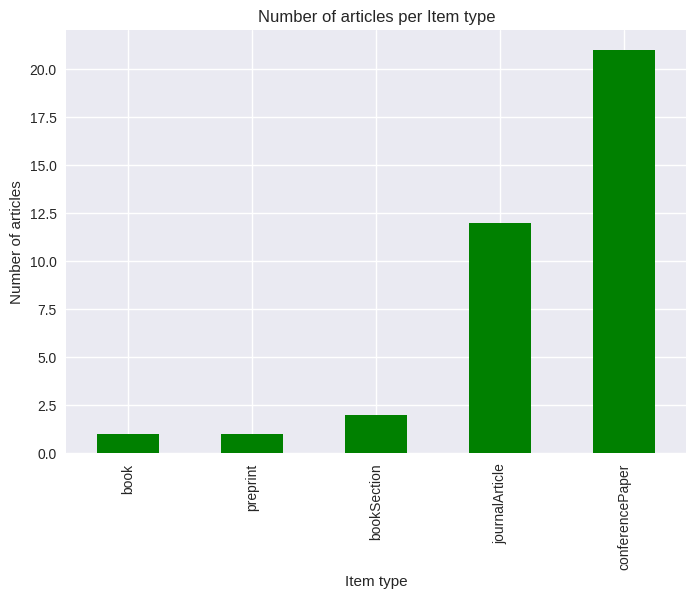

In [628]:
articles['Item Type'].value_counts().sort_values().plot.bar(color='green')
plt.xlabel('Item type')
plt.ylabel('Number of articles')
plt.title('Number of articles per Item type')
plt.show()